<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMSkillsNetworkGPXX0Q8REN2117-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **The Art and Science of Cybersecurity Attack Detection: A Hybrid Approach**


Estimated time needed: **90** minutes


This project aims to improve cyber security by developing a machine learning and rule-based approach to detect cyber attacks. The approach involves analyzing network data to identify potential attacks by identifying correlations between various variables. By completing this project, you will be able to understand how to analyze network data and identify the variables associated with cyber attacks. By leveraging machine learning algorithms and rule-based approaches, this project helps to improve the accuracy and efficiency of cyber attack detection, thereby enhancing the security of digital networks and systems. This project is a valuable first step towards becoming a cyber security expert.

| <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX0Q8REN/CC_CybersecurityDetection.png" width="600" alt="Cyber attack image"> |
|:--:| 


## __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
        </ol>
    </li>
    <li><a href="#3.-Strategies-to-Detect-Cyber-Attacks">Strategies to Detect Cyber Attacks</a></li>
    <li>
        <a href="#4.Cyber Attack Data">Cyber Attacks Data</a>
        <ol>
            <li><a href="#Data Exploration">Data Exploration</a></li>
        </ol>
    </li>
    <li>
        <a href="#5.Rule-Based System">Rule-Based System</a>
        <ol>
            <li><a href="#Evaluation Metric">Evaluation Metric</a></li>
            <li><a href="#Introducing Snort">Introducing Snort For Rule-Based System</a></li>
        </ol>
    </li>
     <li>
        <a href="#6.Machine Learning Model For Cyber Attack Detection">Machine Learning Model For Cyber Attack Detection</a>
        <ol>
            <li><a href="#Building a RandomForest Model">Building a RandomForest Model</a></li>
        </ol>
    </li>
    <li>
        <a href="#7.Human Analysis">Human Analysis</a>
        <ol>
            <li><a href="#7.1. Correlations In The Dataset">Correlations In The Dataset</a></li>
            <li><a href="#7.2 Feature Ranking From Random Forest">Feature Ranking From Random Forest</a></li>
            <li><a href="#7.3 Discussing The Network Features">Discussing The Network Features</a></li>
        </ol>
    </li>
     <li>
        <a href="#8.Cyber Security for Cloud Services">Cyber Security for Cloud Services</a>
    </li>
     <li>
        <a href="#9.List of All Features With Descriptions">List of All Features With Descriptions</a>
    </li>
</ol>


## 1. Objectives

Our main goal is to understand how attacks happen and what are the important indicators of attack. by knowing that, we can implement a monitoring system for attack detection. By completing this project, you will be able to apply your learnings to real-world scenarios and contribute to the ongoing effort to secure the cyber realm.

After completing this lab you will be able to:

- Understand how cyber attacks occur and identify important indicators of attacks.
- Implement a monitoring system for attack detection using both rule-based and machine learning approaches.
- Learn how to visualize variables in network data.
- Gain experience in using machine learning algorithms such as Random Forest for classification and feature ranking.
- Enhance your knowledge and skills in cybersecurity and introducing powerful tools to equipped to detect and prevent cyber attacks.


----


## 2. Setup


### 2.1 Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries in the code cell below.


In [1]:
%%capture 
!pip install -U 'skillsnetwork' 'seaborn' 'nbformat' 


In [2]:
%%capture 
!pip install scikit-learn==1.0.0
!pip install dtreeviz

>  _YOU NEED TO <span style="color:red"> **RESTART THE KERNEL** </span> by going to the `Kernel` menu and clicking on `Restart Kernel`._ 



### 2.2 Importing Required Libraries

_import some essential libraries_


In [1]:
# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

#import shap
import skillsnetwork
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('notebook')
sns.set_style('white')

------------------
## 3. Strategies to Detect Cyber Attacks


1. The first approach to detecting cyber attacks is to use **rule-based system**. These systems use a set of predefined rules to identify potential attacks based on known attack patterns. For example, a rule might flag an attack if the source to destination time to live (sttl) value is less than 10 and the count of states time to live (ct_state_ttl) value is greater than 100. While rule-based systems can be effective in detecting known attacks, they may also produce false positives, so it's important to validate the alerts generated by these systems.

| <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX0Q8REN/images/simple_rule_system.png" width="300" alt="Simple Rule-Based System"></img> |
|:--:| 
| *Simple Rule-Based System* |

2. Another approach to detecting cyber attacks is to use **machine learning algorithms**, such as Random Forest and adaboost. These algorithms are trained on a large dataset of network packets and can be used to identify anomalies in real-time network traffic that might indicate an attack. For example, a machine learning model might detect an attack if the destination to source transaction bytes (rate) value is greater than 10,000.

| <img src="https://cdn.pixabay.com/photo/2019/01/22/10/58/pixel-cells-3947912_1280.png" width="200" alt="Cyber attack image"> |
|:--:| 
| *image credit: https://pixabay.com/* |

3. In addition to these automated methods, **human analysis** can play a critical role in identifying cyber attacks. Human analysts can use their expertise to interpret the data and understand the context in which the attack is taking place. They can also validate the alerts generated by automated systems and take into account the broader context of the organization when analyzing data. For example, they may understand that a particular system is undergoing maintenance and can disregard anomalies in the data that might otherwise indicate an attack.

| <img src="https://cdn.pixabay.com/photo/2018/03/11/06/15/cyber-security-3216076_1280.jpg" width="200" alt="human analysis"> |
|:--:| 
| *image credit: https://pixabay.com/* |

Therefore, our strategy involves utilizing establishing a rule-based system as the first layer of detection. Then, we utilize a machine learning algorithm to pinpoint attacks. Finally, we delve into the variables to understand their significance and examine their importance as indicators of cyber attacks. This will contribute to developing cyber security knowledge for human analysis.


--------------------------------


## 4. Cyber Attack Data
The data is collected by the [University of New South Wales (Australia)](https://research.unsw.edu.au/projects/unsw-nb15-dataset?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMSkillsNetworkGPXX0Q8REN2117-2023-01-01). That includes records of different types of cyber attacks. The dataset contains network packets captured in the Cyber Range Lab of UNSW Canberra. The data is provided in two sets of training and testing data. We combine them to create one set of larger data.   


In [3]:
## loading the data
training = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX0Q8REN/UNSW_NB15_training-set.csv")
testing = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX0Q8REN/UNSW_NB15_testing-set.csv")
print("training ",training.shape)
print("testing ",testing.shape)

training  (82332, 45)
testing  (175341, 45)


To achieve a better performance, we will create a larger dataset and assign 70% for training and 30% to testing.


In [4]:
# checking if all the columns are similar
all(training.columns == testing.columns)

True

In [5]:
# creating one-whole dataframe which contains all data and drop the 'id' column
df = pd.concat([training,testing]).drop('id',axis=1)
df = df.reset_index(drop=True)

# print one attack sample
df.head(2)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,...,1,2,0,0,0,1,2,0,Normal,0


The dataset includes 43 variables regarding monitoring the network and 2 variables that define if an attack happens (`label`) and the types of attacks (`attack_cat`). The description of all the variables is available at the end of this notebook.

Lets quick look on the types of attacks.


In [6]:
# getting the attack category column 
df.attack_cat.unique()

array(['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'],
      dtype=object)

| <img src="https://cdn.pixabay.com/photo/2022/03/15/16/52/scam-7070718_1280.png" width="600" alt="hacking"> |
|:--:| 
| *image credit: https://pixabay.com/* |

The dataset includes nine types of attacks, including:

1. `Fuzzers`: Attack that involves sending random data to a system to test its resilience and identify any vulnerabilities.

2. `Analysis`: A type of attack that involves analyzing the system to identify its weaknesses and potential targets for exploitation.

3. `Backdoors`: Attack that involves creating a hidden entry point into a system for later use by the attacker.

4. `DoS (Denial of Service)`: Attack that aims to disrupt the normal functioning of a system, making it unavailable to its users.

5. `Exploits`: Attack that leverages a vulnerability in a system to gain unauthorized access or control.

6. `Generic`: A catch-all category that includes a variety of different attack types that do not fit into the other categories.

7. `Reconnaissance`: Attack that involves gathering information about a target system, such as its vulnerabilities and potential entry points, in preparation for a future attack.

8. `Shellcode`: Attack that involves executing malicious code, typically in the form of shell scripts, on a target system.

9. `Worms`: A type of malware that spreads itself automatically to other systems, often causing harm in the process.

These nine categories cover a wide range of attack types that can be used to exploit a system, and it is important to be aware of them to protect against potential security threats.


### 4.1. Data Exploration


In this section, we briefly explore our dataset.


In [6]:
# exploring the types of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   proto              257673 non-null  object 
 2   service            257673 non-null  object 
 3   state              257673 non-null  object 
 4   spkts              257673 non-null  int64  
 5   dpkts              257673 non-null  int64  
 6   sbytes             257673 non-null  int64  
 7   dbytes             257673 non-null  int64  
 8   rate               257673 non-null  float64
 9   sttl               257673 non-null  int64  
 10  dttl               257673 non-null  int64  
 11  sload              257673 non-null  float64
 12  dload              257673 non-null  float64
 13  sloss              257673 non-null  int64  
 14  dloss              257673 non-null  int64  
 15  sinpkt             257673 non-null  float64
 16  di

As we can see, some variables, that are categorical, are defined as strings. In the following cell we convert them into categorical type provided by `pandas`.


In [31]:
# some columns should be change from string to categoriacal
for col in ['proto', 'service', 'state']:
    df[col] = df[col].astype('category').cat.codes
    df[col] = df[col].astype('category').cat.codes
    
df['attack_cat'] = df['attack_cat'].astype('category') # keep the nomical info for attack info

Exploring how many records of different types of attacks are in the dataset.


Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Normal                0
Name: attack_cat, dtype: int64


<AxesSubplot:ylabel='attack_cat'>

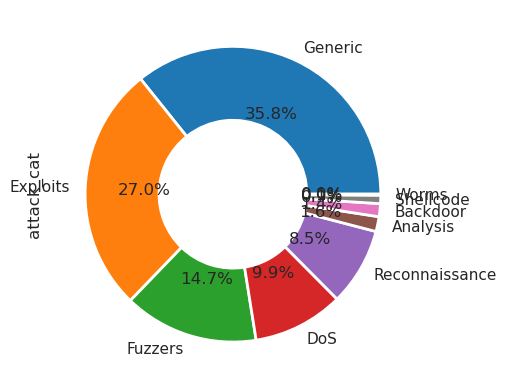

In [30]:
# explore different types of attackes
print(df[df['label']==1]
     ['attack_cat']
     .value_counts()
)
# plot the pie plot of attacks
df[df['label']==1]['attack_cat'].value_counts()\
    .plot\
    .pie(autopct='%1.1f%%',wedgeprops={'linewidth': 2, 'edgecolor': 'white', 'width': 0.50})

-----------------


## 5. Rule-Based System

| <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX0Q8REN/images/simple_rule_system.png" width="400" alt="Simple Rule-Based System"></img> |
|:--:| 
| *Simple Rule-Based System* |

Both **rule-based systems and machine learning systems** have their own strengths and weaknesses, and using both together can provide a more comprehensive and effective approach to detecting cyber attacks. Here are a few reasons why:

1. Explainability: Rule-based systems provide clear and concise rules that can be easily understood and interpreted by human experts. This makes it easier to understand how the system is making its predictions and to validate the results.

2. Robustness: Rule-based systems are less likely to be affected by unexpected changes in the data distribution compared to machine learning models. They can still provide accurate results even when the data changes, as long as the rules remain valid.

3. Speed: Rule-based systems can be much faster than machine learning models, especially for simple problems. This can be important in real-time monitoring systems where the response time needs to be fast.

4. Complementary strengths: Rule-based systems and machine learning models can complement each other. Rule-based systems can be used to detect simple, well-defined attacks, while machine learning models can be used to detect more complex, subtle attacks.

In our project, we first employ rule-based model and then we utilize machine learning model.
By combining rule-based systems and machine learning models, it is possible to take advantage of the strengths of each approach to create a more effective and comprehensive system for detecting cyber attacks.


### 5.1. Evaluation Metric

In the rule-based model, we are looking for higher recall rate because we are sensitive to alarm potential threats, and we can not afford to miss attacks (FALSE NEGATIVE). Recall (or True Positive Rate) is calculated by dividing the true positives (actual attacks) by anything that should have been predicted as positive (detected and non-detected attacks).


|<img src="https://keytodatascience.com/wp-content/uploads/2019/09/values.jpg" width="400" alt="IBM Watson"> |
|:--:| 
| Learn more about confusion matrix (and image credit): https://keytodatascience.com/confusion-matrix/  |


In [29]:
# separating the target columns in the training and testing data 
from sklearn.model_selection import train_test_split

# Split the data into variables and target variables
# let's exclude label columns 
X = df.loc[:, ~df.columns.isin(['attack_cat', 'label'])]
y = df['label'].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

# Getting the list of variables
feature_names = list(X.columns)

# print the shape of train and test data
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (180371, 42)
y_train shape:  (180371,)
X_test shape:  (77302, 42)
y_test shape:  (77302,)


We use a decision tree model to create a set of criteria for detecting cyber attacks in our rule-based system. The goal of this first layer of protection is to have a high recall rate, so we conduct a grid search to optimize the model toward maximizing recall.


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

# Create a decision tree classifier
dt = DecisionTreeClassifier()

# Use GridSearchCV to search for the best parameters
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best recall score:", grid_search.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best recall score: 1.0


Using the parameters above, adjust the decision tree for high recall rate.


In [12]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

clf=grid_search.best_estimator_
#same as
#clf = DecisionTreeClassifier(max_depth=2, min_samples_leaf=1, min_samples_split=2, criterion= 'entropy')
#clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the mean absolute error of the model
recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

Recall:  1.0


One of the strengths of a decision tree is to present the sets of rules than can be utilized for rule-based systems. Here, we visualize the rules.


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


:::::::> The RULES FOR HIGH RECALL RATE <::::::: 
 |--- sttl <= 61.00
|   |--- sinpkt <= 0.00
|   |   |--- class: 1
|   |--- sinpkt >  0.00
|   |   |--- class: 0
|--- sttl >  61.00
|   |--- synack <= 0.04
|   |   |--- class: 1
|   |--- synack >  0.04
|   |   |--- class: 1



findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


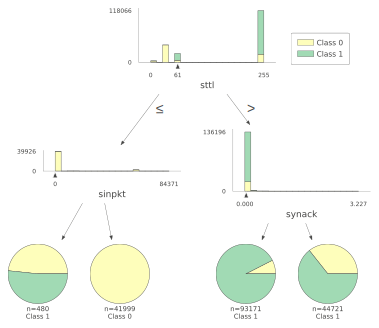

In [13]:
# plot the tree 
from sklearn.tree import export_text
import dtreeviz

print(":::::::> The RULES FOR HIGH RECALL RATE <::::::: \n" ,export_text(clf,feature_names=feature_names))

# visualizing the tree
viz_model = dtreeviz.model(clf,
                           X_train=X_train, y_train=y_train, 
                           feature_names=feature_names)

v = viz_model.view(fancy=True)     # render as SVG into internal object 
v

We create rules for those that are identified as potential attacks (`class 1`) in the decision tree. Then, filter out the testing set.


We apply our rules to the testing data and call them `test_2`.


In [15]:
X_test = X_test.reset_index(drop=True)

# filter out testing part based on our rules
rules= "(sttl <= 61.00 & sinpkt<= 0.00) | (sttl >  61.00 )"

# getting the index of records to keep
ind = X_test.query(rules).index

# filtering test set (both X_test and y_test)
X_test_2 = X_test.loc[ind,:]
y_test_2 = y_test[ind]

print(X_test.shape)
print(X_test_2.shape)
print("filtered data" , (1- np.round(X_test_2.shape[0] / X_test.shape[0],2))*100, "%")

(77302, 42)
(59425, 42)
filtered data 23.0 %


Our simple rule-based system filtered 23% of network traffic for further analysis, demonstrating its efficacy in detecting non-threatening network activity. In practice, rule-based systems are more complex and capable of detecting the vast majority of non-threatening network traffic.

The next step involves using machine learning to detect cyber attacks by applying the trained model to the filtered data (`test_2`) from the previous step. It may be useful to introduce Snort, which is a powerful open-source detection software that can be utilized for network security.


### 5.2. Introducing Snort For Rule-Based System



`Snort` is a free and open-source rule-based system for network intrusion detection and prevention system (NIDPS) developed by Cisco. It uses rules to analyze network traffic and identify potential security threats based on specific patterns or behaviors. `Snort` comes with a set of pre-defined rules that can be used for basic intrusion detection. These rules are included in the "rules" directory in the `Snort` installation and can be enabled in the configuration file. The default rules cover a range of attack types, such as buffer overflows, SQL injection, and network scanning, and can be a good starting point for building a more customized intrusion detection system. However, it's important to note that the default rules are not comprehensive and may not provide complete coverage for all possible attack scenarios.


| <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX0Q8REN/images/snort.png" width="300" alt="Cyber attack image"> |
|:--:| 
| *source: https://www.snort.org/* |

Covering the implementation of `Snort` will be beyond the scope of this project; However, here are some general steps to get started with `Snort`:

> 1. Install Snort: You can [download Snort from the official website](https://www.snort.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMSkillsNetworkGPXX0Q8REN2117-2023-01-01), and install it on your system. Make sure to follow the instructions carefully.
> 2. Configure Snort: Once Snort is installed, you will need to configure it. This includes setting up the network interface to monitor, defining the rules that Snort should use to detect suspicious traffic, and specifying the logging and alerting options.
> 3. Create Rules: Snort uses rules to detect various types of suspicious activity. Rules are typically written in a specific format, and include information such as the type of traffic to monitor, the conditions for detection, and the alerting options. You can write your own custom rules, or use pre-defined rules that come with Snort.
> 4. Start Snort: Once Snort is installed and configured, you can start it to begin monitoring traffic on the specified network interface. Snort will run in the background, and will generate alerts or log events when suspicious activity is detected.
> 5. Analyze Alerts: When Snort detects suspicious activity, it will generate alerts or log events, depending on your configuration. You can then use these alerts to investigate and respond to the detected activity.

It is important to note that using Snort effectively requires a solid understanding of networking, security, and the various threats that can be detected. It is recommended that you invest time in learning these topics and building your skills before using Snort in a production environment.

**_However, keep in mind that rule-based models may not be enough to protect against cyber attacks, especially in cloud services where more sophisticated strategies are needed. I will elaborate a cloud Security tool call `Qradar` in part 8._** 


-------------------------------


## 6. Machine Learning Model For Cyber Attack Detection

| <img src="https://cdn.pixabay.com/photo/2019/01/22/10/58/pixel-cells-3947912_1280.png" width="300" alt="Cyber attack image"> |
|:--:| 
| *image credit: https://pixabay.com/* |


The combination of machine learning and rule-based models offers several advantages in detecting cyber attacks:

1. Improved accuracy: Machine learning models can identify complex patterns and relationships in data, whereas rule-based models are limited by the explicit rules defined.
2. Enhanced interpretability: Rule-based models are easier to understand and interpret, making it easier to validate the results generated by machine learning models.
3. Increased speed: Machine learning models can quickly analyze large amounts of data, while rule-based models can make decisions faster in real-time.
4. Better scalability: Machine learning models can be easily updated and retrained on new data, while rule-based models can be difficult to update as the threat landscape changes.
5. Enriched data utilization: Both methods can complement each other by using different data sources and types, leading to a more comprehensive analysis.


### 6.1. Building a RandomForest Model

Random Forest is a good choice for cyber attack detection due to its high accuracy in classifying complex data patterns. The ability to interpret the results of Random Forest models also makes it easier to validate and understand the decisions it makes, leading to more effective and efficient cyber security measures.


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score

# Create a Random Forest model
rf = RandomForestClassifier(random_state=123)

# Train the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test_2)

# Calculate the mean absolute error of the model
acc = accuracy_score(y_test_2, y_pred)
rec = recall_score(y_test_2, y_pred)
per = precision_score(y_test_2, y_pred)
print("Recall: ", rec)
print("Percision: ", per)
print("Accuracy: ", acc)

Recall:  0.9574644358228257
Percision:  0.964559074993893
Accuracy:  0.9352797644089188


As we can see, the random forest algorithm showed strong performance in cyber attack detection. To gain better insight into the performance of our prediction model, let's plot a confusion matrix. It is important to note that the majority of our data contains actual attack information, as we filtered out some portion of non-threatening traffic in the previous step.


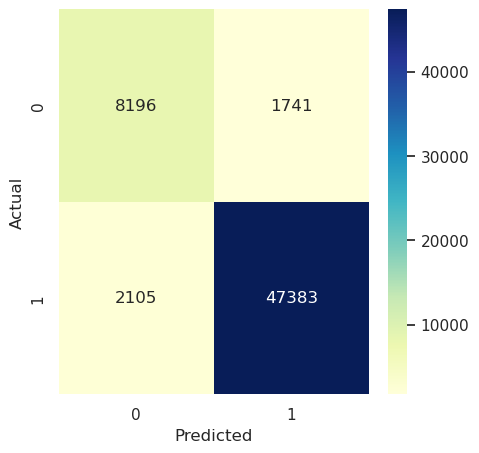

In [17]:
# plot confusion matrix
cross = pd.crosstab(pd.Series(y_test_2, name='Actual'), pd.Series(y_pred, name='Predicted'))
plt.figure(figsize=(5, 5))
sns.heatmap(cross, annot=True,fmt='d', cmap="YlGnBu")
plt.show()

To understand the functioning of the final tree in the random forest, we will print the rules present in the 100th tree to a file named `Tree_output.txt`. You can access to the file by clicking `file browser` located in the left panel or pressing `ctrl + shift + f` (in Windows) and `command + shift + f` (in Mac).

This will allow us to have a visual representation of the tree and help to better understanding of how the model is making decisions to detect cyber attacks. The rules present in the tree can also be used as a reference for developing a rule-based system or for fine-tuning the model for better results. The output will also highlight the most important factors considered by the model for attack detection, which can be useful for further analysis and optimization.


In [18]:
# save the 100th tree sample in random forest in the file 
from sklearn.tree import export_text
feature_names = list(X.columns)

# Create a file and write to it
with open("Tree_output.txt", "w") as file:
    print(export_text(rf.estimators_[99], 
            spacing=3, decimals=2,
            feature_names=feature_names), file=file)

### Exercise: try GBM classifier with grid search on the parameters


In [19]:
# try grid search on GBM parameters first
from sklearn.ensemble import GradientBoostingClassifier

# Define the Gradient Boosting Classifier model
gbc = GradientBoostingClassifier()

# Define the hyperparameters for Grid Search
# we purposely reduce the number of possible parameters due to the process time
param_grid = {
    'learning_rate': [0.01],
    'n_estimators': [50],
    'max_depth': [3, 5]
}

# Perform Grid Search on the GBC model with 5-fold cross-validation
grid_search = GridSearchCV(gbc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
Best score:  0.8928153654740116


<details>
    <summary>Click here for a Hint</summary>
    
```python

from sklearn.ensemble import GradientBoostingClassifier

# Define the Gradient Boosting Classifier model
gbc = GradientBoostingClassifier()

# Define the hyperparameters for Grid Search
# we purposely reduce the number of possible parameters due to the process time
param_grid = {
    'learning_rate': [0.1],
    'n_estimators': [100],
    'max_depth': [1, 3, 5]
}

# Perform Grid Search on the GBC model with 5-fold cross-validation
grid_search = GridSearchCV(gbc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

```
</details>


In [20]:
# apply the parameters to GBM model
# write your code here
# tryin GBM
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=50, random_state=0).fit(X_train, y_train)
print(clf.score(X_test_2, y_test_2))

y_pred = gbc.predict(X_test_2)

# Calculate the mean absolute error of the model
acc = accuracy_score(y_test_2, y_pred)
rec = recall_score(y_test_2, y_pred)
per = precision_score(y_test_2, y_pred)
print("Recall: ", rec)
print("Percision: ", per)
print("Accuracy: ", acc)

0.832780816154817
Recall:  0.9588789201422567
Percision:  0.9297946547535073
Accuracy:  0.9054606647034077


<details>
    <summary>Click here for a Hint</summary>
    
```python

# tryin GBM
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
print(clf.score(X_test_2, y_test_2))

y_pred = gbc.predict(X_test_2)

# Calculate the mean absolute error of the model
acc = accuracy_score(y_test_2, y_pred)
rec = recall_score(y_test_2, y_pred)
per = precision_score(y_test_2, y_pred)
print("Recall: ", rec)
print("Percision: ", per)
print("Accuracy: ", acc)
```
</details>


## 7. Human Analysis

In addition to these automated methods, human analysis can play a critical role in identifying cyber attacks. Human analysis is important in identifying cyber attacks. Analysts use their expertise to interpret data and understand the context of an attack. Understanding key variables in network data is crucial for effective human analysis in detecting cyber attacks.


### 7.1. Correlations In The Dataset

To improve our understanding of the variables involved in cyber attack detection, we need to analyze the network data. Correlation diagrams can be helpful in visualizing how different variables are associated with each other and with cyber attacks. Additionally, random forest models can help identify the importance of different features in predicting the target variable (cyber attacks). We can compare the feature rankings from the random forest with the results of the correlation analysis to gain a better understanding of the key features to focus on for effective cyber attack detection.


<AxesSubplot:>

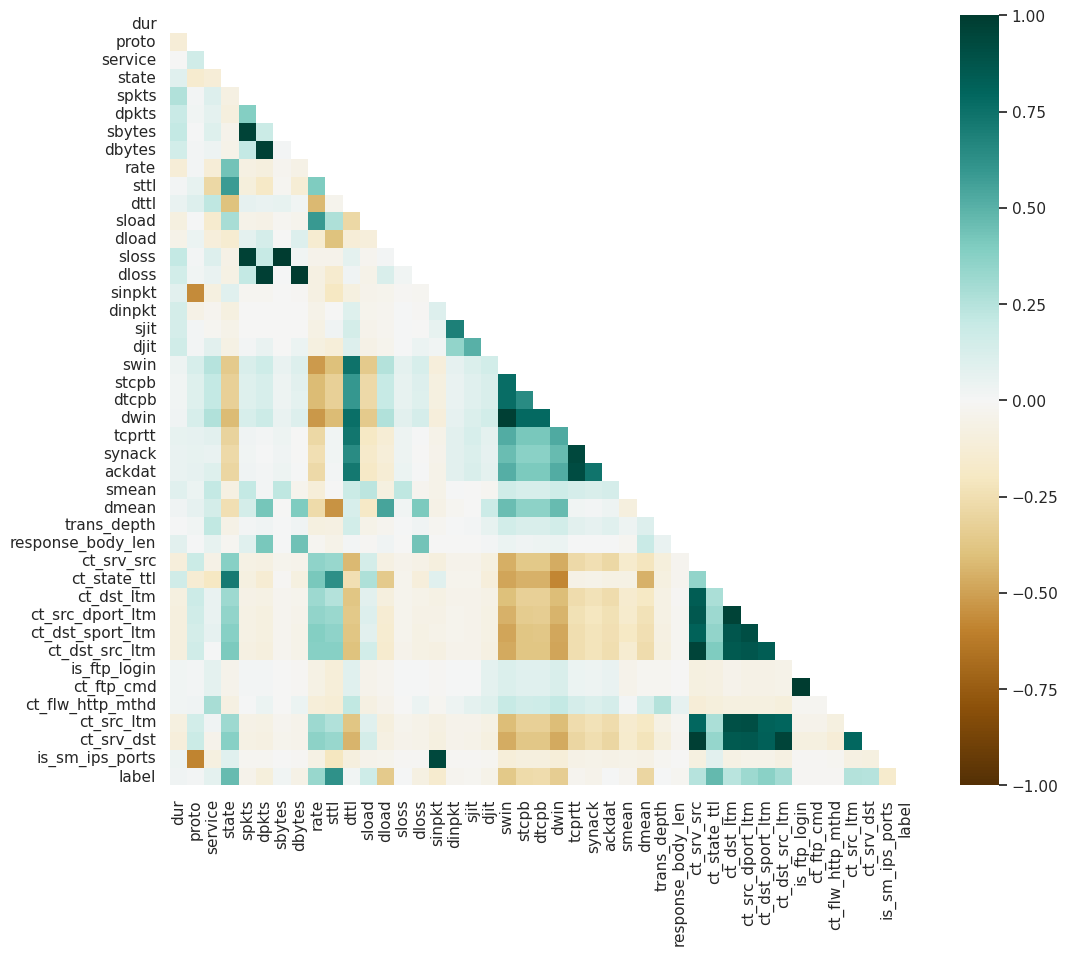

In [21]:
# creating the correlation matrix
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.heatmap(df.corr(),vmin=-1, vmax=1,cmap='BrBG', mask=mask)

The heatmap visualizes the correlation between variables in the dataset. It shows that certain features are highly correlated, such as `tcprtt` with `ackdat` and `synack`. This is because these variables measure different aspects of the same TCP connection setup process. Specifically, `tcprtt` is the round-trip time it takes for the TCP connection to be established, while `ackdat` measures the time between the `SYN_ACK` and `ACK` packets, and `synack` measures the time between the SYN and `SYN_ACK` packets. Since these variables are all related to the same underlying process of establishing a TCP connection, they are highly correlated.


Let's have a look at the correlation of variables with the cyber attack (label column):


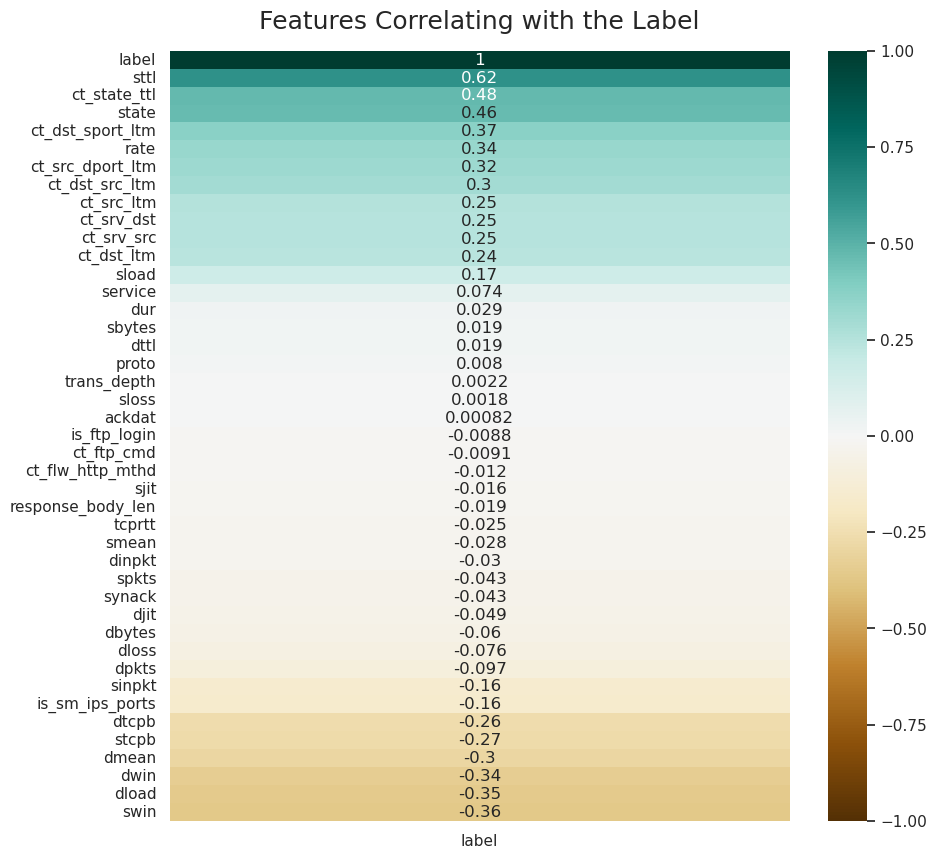

In [22]:
# modify the headmap plot to show correlation variables to the label 
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(df.corr()[['label']].sort_values(by='label', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with the Label', fontdict={'fontsize':18}, pad=16);

The following variables are positively correlated with cyber attacks:

> - `sttl`: Source to destination time to live value. Attackers may use techniques such as packet fragmentation or tunneling to avoid detection or bypass security measures, which can increase the number of hops or decrease the TTL value. A higher value for sttl may be indicative of such techniques.  
> - `ct_state_ttl` and `state`: These features reflect various stages of TCP connections and may be related to port scanning, SYN flood, or DDoS attacks. Attackers may exploit the state of TCP connections using different techniques, which may be reflected in the values of ct_state_ttl and state.
> - `ct_dst_sport_ltm`: This feature measures the number of connections from the same source IP to the same destination port in a short time period. Attackers may initiate multiple connections to the same port in a short time period to exploit vulnerabilities or launch attacks against a particular service or application, which may be reflected in a higher value for ct_dst_sport_ltm.
> - `rate`: This feature may represent various types of traffic rates or frequencies. Attackers may generate high traffic rates or bursts of traffic to overwhelm or bypass security measures, which may be reflected in a higher value for rate.

In contrast, the following variables are negatively correlated with cyber attacks:

> - `swin`: The size of the TCP window may decrease during an attack when attackers try to flood the network with traffic. A lower value for swin may be indicative of such attacks.
> - `dload`: A decrease in the download speed may be indicative of an attack that consumes network bandwidth, such as DDoS attacks or worm propagation. A lower value for dload may be reflective of such attacks.


### 7.2. Feature Ranking From Random Forest

The random forest provides a list of features based on their contributions to the prediction model.
The feature ranking can be accessed through RandomForest object (in our example `rf`) using `feature_importances_` attribute.


In [23]:
# creating of ranking data frame
feature_imp = pd.DataFrame({'Name':X.columns, 'Importance':rf.feature_importances_})

# sorting the features based on their importance value
feature_imp = feature_imp.sort_values('Importance',ascending=False).reset_index(drop=True)

# show only 10 most important feature in style of gradien of colores
feature_imp[:10].style.background_gradient()

,Name,Importance
0,sttl,0.139708
1,ct_state_ttl,0.107578
2,rate,0.052387
3,dload,0.049926
4,sload,0.047473
5,sbytes,0.040504
6,ct_dst_src_ltm,0.040064
7,smean,0.039948
8,ct_srv_dst,0.036520
9,dbytes,0.034286


<AxesSubplot:>

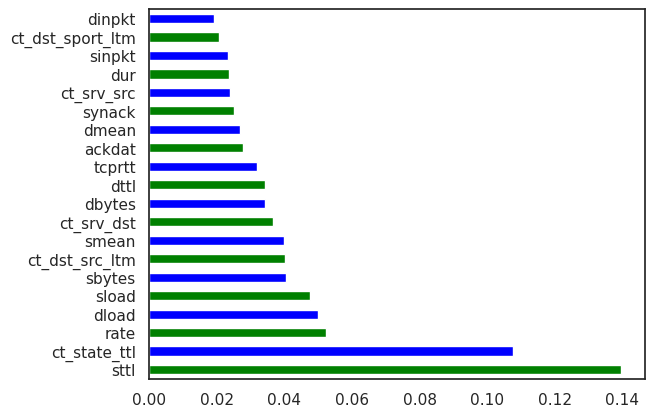

In [24]:
# plot the important features
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh',color=['g','b']*5)

As we can see, the feature importance ranking is aligned with correlation result. This highlights the importance of top features such `sttl`, `ct_stat_ttl`, `rate`, and `dload`. 


Following is a brief description of some of these important features (a full list of features is available at the end of this notebook).

|No.|Name            |Type     |Description                                                                                                                                                       |
|---|----------------|---------|------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|10 |sttl            |Integer  |Source to destination time to live value |
|37 |ct_state_ttl    |Integer  |No. for each state (6) according to specific range of values for source/destination time to live (10) (11)(see the full list at the end of this project to find no 6,10,11).                                                       |
|9  |rate          |Integer  |Destination to source transaction bytes|
|16 |Dload           |Float    |Destination bits per second  |
|15 |Sload           |Float    |Source bits per second  |                                                                                                                                       
|47 |ct_dst_src_ltm  |integer  |No of connections of the same source (1) and the destination (3) address in in 100 connections according to the last time (26).                                   |
|23 |smeansz         |integer  |Mean of the ?ow packet size transmitted by the src                                                                                                                |
|8  |sbytes          |Integer  |Source to destination transaction bytes                                                                                                                           |
|22 |dtcpb           |integer  |Destination TCP base sequence number                                                                                                                              |
|42 |ct_srv_dst      |integer  |No. of connections that contain the same service (14) and destination address (3) in 100 connections according to the last time (26).                             |
|6  |state           |nominal  |Indicates to the state and its dependent protocol, e.g. ACC, CLO, CON, ECO, ECR, FIN, INT, MAS, PAR, REQ, RST, TST, TXD, URH, URN, and (-) (if not used state)    |
|46 |ct_dst_sport_ltm|integer  |No of connections of the same destination address (3) and the source port (2) in 100 connections according to the last time (26).                                 |
|7  |dur             |Float    |Record total duration                                                                                                                                             


### Exercise: Select These Top 10 Features And Compare the Performance 


In [36]:

# Ottenere le feature più importanti (top 10)
top10 = feature_imp.Name[:10].tolist()

# Selezionare solo le feature top 10
X = df.loc[:, df.columns.isin(top10)]
y = df['label'].values

# Creare l'istanza del modello RandomForestClassifier
rf_top10 = RandomForestClassifier(random_state=11)

# Suddividere i dati in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

# Addestrare il modello sui dati di addestramento
rf_top10.fit(X_train, y_train)

# Effettuare previsioni sui dati di test
y_pred = rf_top10.predict(X_test)

# Calcolare l'accuratezza del modello
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.9420713564978914


<details>
    <summary>Click here for Solution</summary>
    
```python

top10= feature_imp.Name[:10].tolist()

X = df.loc[:, df.columns.isin(top10)]
y = df['label'].values

rf_top10 = RandomForestClassifier(random_state=11)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

# Train the model on the training data
rf_top10.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_top10.predict(X_test_2)

# Calculate the mean absolute error of the model
acc = accuracy_score(y_test_2, y_pred)
print("Accuracy: ", acc)

#  Accuracy:  0.91  
```


Let's select only the top 10 features and find their associations with the type of cyber attack.


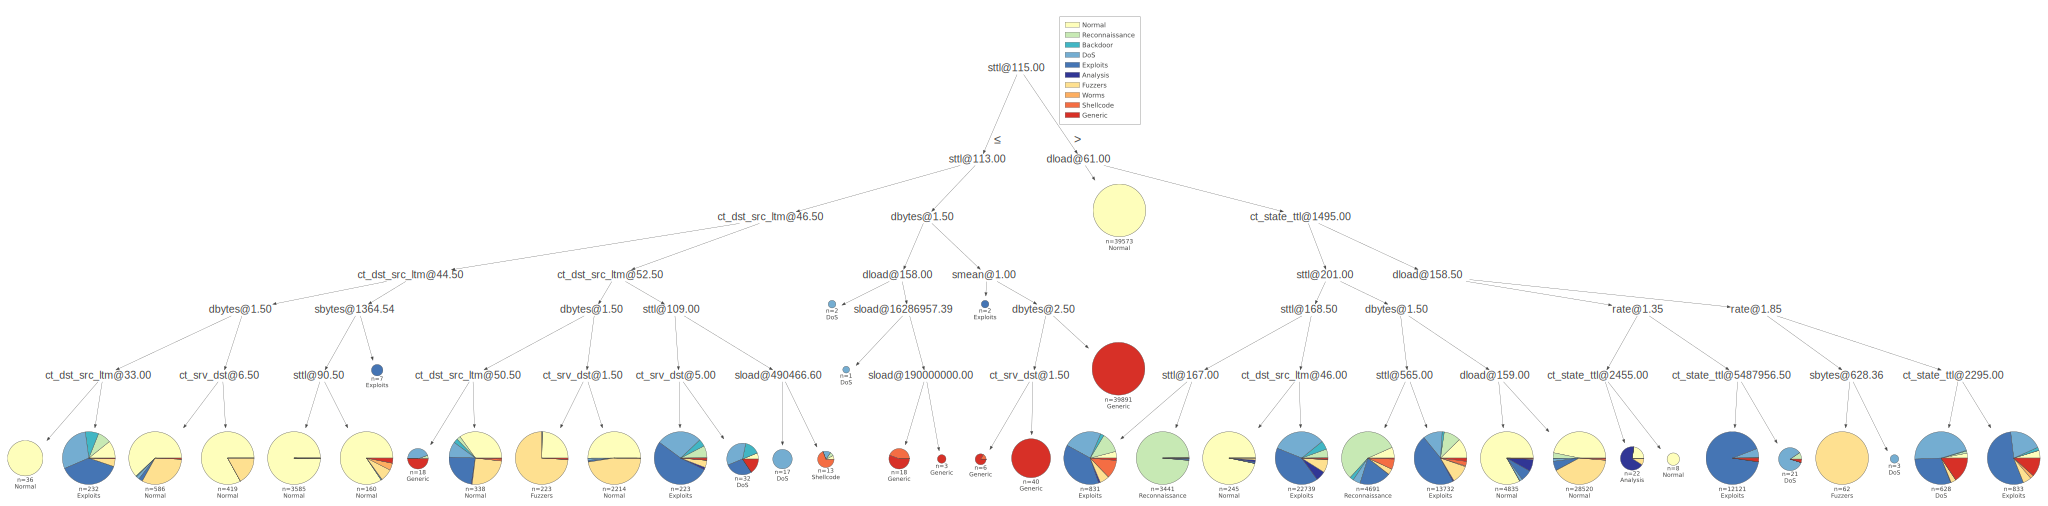

In [37]:
# get the names of top 10 features
top10= feature_imp.Name[:10].tolist()

# get the attack names
attack_names = np.array(df['attack_cat'].unique())

# selecting only top 10 features
X_top = df.loc[:, df.columns.isin(top10)]
# need to convert the catagorical data into numbers (e.g. normal ->0, Blackdoor ->2)
y_top = pd.factorize(df['attack_cat'])[0]


# for the purpose of visualization we set max_depth to 6 in order to be shown in the notebook
clf_top10 = DecisionTreeClassifier(max_depth=6)

# Split the data into train and test sets
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y_top, test_size=0.3, random_state=11)

# Train the model on the training data
clf_top10.fit(X_train_top, y_train_top)

# visualizing the tree
viz_model = dtreeviz.model(clf_top10,
                           X_train=X_train_top, y_train=y_train_top, 
                           class_names=attack_names,
                           feature_names=top10)

v = viz_model.view(fancy=False,scale=1) # render as SVG into internal object 
v
#v.save("The_100th_tree.svg") # if you willing to save the 

For a better understanding, we can randomly select a point and visualize the path for prediction.


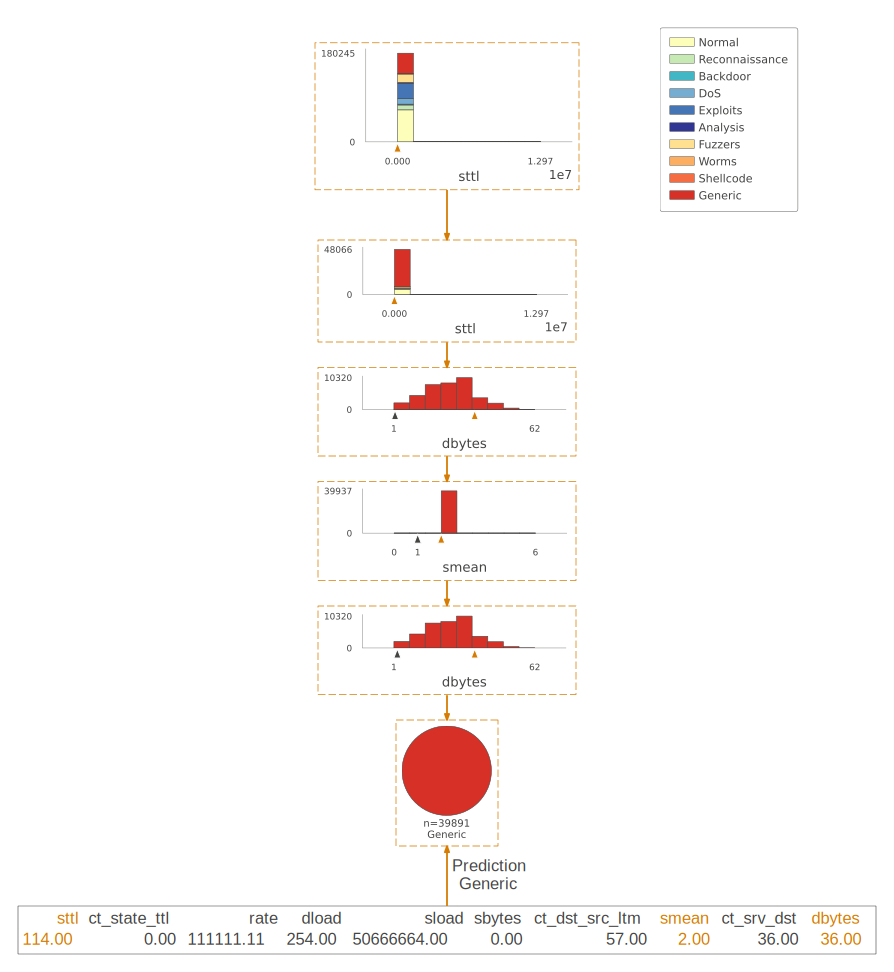

In [38]:
# get a random point
rand = np.random.randint(0, len(X))
sample_point = X.iloc[rand,:].values

# visualizing the path for the point
v = viz_model.view(fancy=True,scale=1.5,x=sample_point,show_just_path=True)
v

please keep in mind that we utilize a simple decision tree for visualization (above cells), and random forest can outperform decision tree in predicting the type of attack.


### Exercise: Run Random Forest With Attack Category As the Prediction Labels And Plot The Confusion Matrix


Accuracy:  0.8246875889368969


<AxesSubplot:xlabel='col_0', ylabel='row_0'>

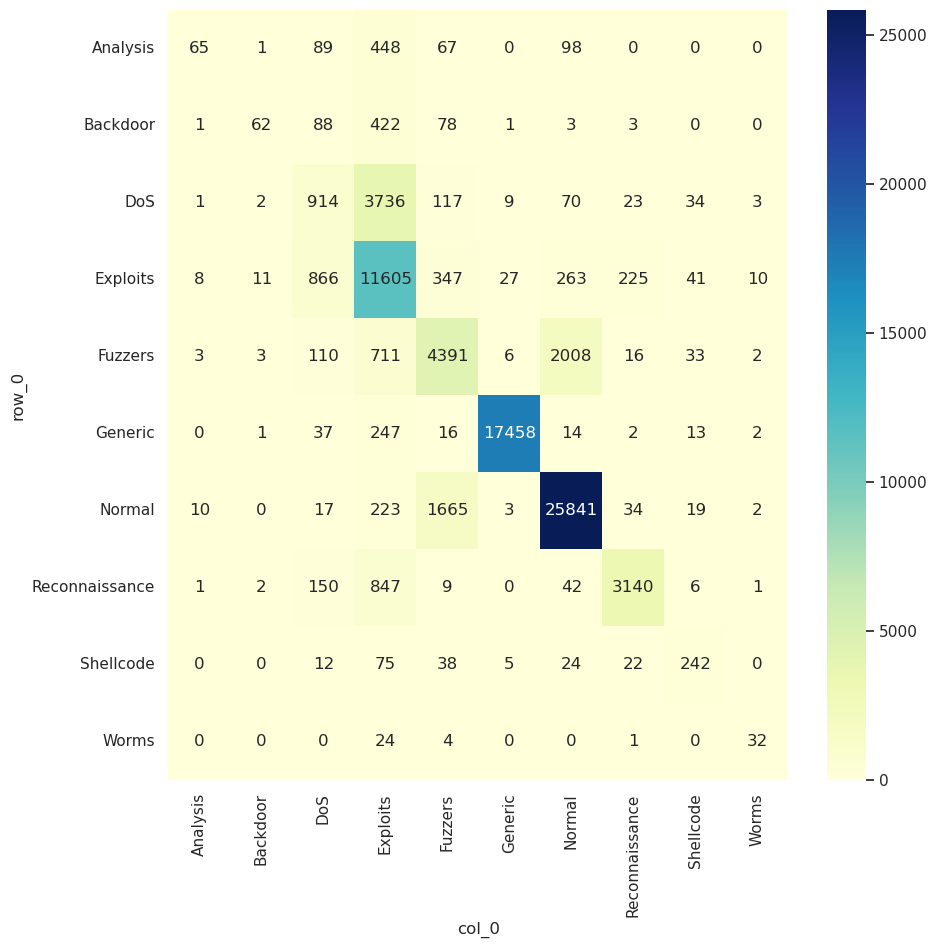

In [39]:
top10= feature_imp.Name[:10].tolist()

X = df.loc[:, df.columns.isin(top10)]

# X = df.loc[:, ~df.columns.isin(['attack_cat', 'label'])] # if you like to use all features use this line
y = df['attack_cat'].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

# Create a Random Forest model
rf = RandomForestClassifier(random_state=123,min_samples_leaf= 1, min_samples_split= 5, n_estimators= 100)

# Train the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Calculate the mean absolute error of the model
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

cross = pd.crosstab(y_test,  y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cross, annot=True,fmt='d', cmap="YlGnBu")

<details>
    <summary>Click here for solution</summary>
    
```python 

top10= feature_imp.Name[:10].tolist()

X = df.loc[:, df.columns.isin(top10)]

# X = df.loc[:, ~df.columns.isin(['attack_cat', 'label'])] # if you like to use all features use this line
y = df['attack_cat'].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

# Create a Random Forest model
rf = RandomForestClassifier(random_state=123,min_samples_leaf= 1, min_samples_split= 5, n_estimators= 100)

# Train the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Calculate the mean absolute error of the model
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

cross = pd.crosstab(y_test,  y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cross, annot=True,fmt='d', cmap="YlGnBu")

```
    
</details>


### 7.3 Discussing The Network Variables and Their Role in Detecting Different Types of Cyber Attacks.


Let's discuss about some of the important features for detecting the type of cyber attack.

`sttl`: Source to destination time to live value can be used to detect attacks such as packet fragmentation or tunneling that can increase the number of hops or decrease the TTL value. These techniques are often used by attackers to avoid detection or bypass security measures. A higher value for sttl may indicate the presence of such techniques.

`ct_state_ttl` and `state`: These features reflect the various stages of TCP connections and can be related to port scanning, SYN flood, or DDoS attacks. Attackers can exploit the state of TCP connections using different techniques, which may be reflected in the values of ct_state_ttl and state.

`rate`: This feature can represent various types of traffic rates or frequencies. Attackers may generate high traffic rates or bursts of traffic to overwhelm or bypass security measures, which may be reflected in a higher value for rate.

`dload`: A decrease in the download speed may indicate an attack that consumes network bandwidth, such as DDoS attacks or worm propagation. A lower value for dload may be reflective of such attacks.

The different types of attacks can have different characteristics that can be detected using network variables. For example, DoS attacks aim to disrupt the normal functioning of a system, so an increase in the rate of traffic or a decrease in the download speed may indicate the presence of such an attack. Port scanning, SYN flood, and DDoS attacks can be reflected in the values of ct_state_ttl and state. Fuzzers and analysis attacks may involve generating large amounts of traffic, which can be reflected in the value of rate. Reconnaissance attacks involve gathering information about a target system, which can potentially be detected by analyzing network traffic. Finally, shellcode and worm attacks can be detected by analyzing the content of network packets.


### Bonus Exercise - Run Deep Neural Network On The Dataset 


In [40]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error , auc
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create a DNN model

model = Sequential()
# The Input Layer
model.add(Dense(512, activation='relu', input_dim = X_train.shape[1]))

# The Hidden Layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

# The Output Layer

model.add(Dense(2, activation='softmax'))

# Compile the network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

model.fit(X_train, y_train, epochs=5)

Using TensorFlow backend.







_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               5632      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 130       
Total params: 79,682
Trainable params: 79,682
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/5


2023-07-11 10:16:34.568106: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
2023-07-11 10:16:34.573535: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2394295000 Hz
2023-07-11 10:16:34.574208: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55bd7645b3f0 executing computations on platform Host. Devices:
2023-07-11 10:16:34.574260: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2023-07-11 10:16:34.688630: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line fl

ValueError: could not convert string to float: 'Fuzzers'

<details>
    <summary>Click here for Solution</summary>

```python
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error , auc
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create a DNN model

model = Sequential()
# The Input Layer
model.add(Dense(512, activation='relu', input_dim = X_train.shape[1]))

# The Hidden Layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

# The Output Layer

model.add(Dense(2, activation='softmax'))

# Compile the network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

model.fit(X_train, y_train, epochs=5)

```

</details>


## 8. Cyber Security for Cloud Services


We may scratch the surface, but as you start implementing your system, you will inevitably encounter complex issues. However, there are powerful cybersecurity tools available that you should consider.



The complexities of cybersecurity in cloud services include shared responsibility, data privacy, complex architecture, multi-tenancy, regulatory compliance, and vulnerability to attacks. To mitigate these risks, effective cybersecurity strategies must be in place.

Implementing cybersecurity measures for cloud computing can be particularly challenging due to several reasons, such as:

> 1. Shared responsibility: In cloud computing, the responsibility for security is shared between the cloud provider and the customer, which can lead to confusion and a lack of clear ownership over security issues.
> 2. Complex architecture: Cloud environments typically have a complex and dynamic architecture, making it difficult to implement and manage effective security controls.
> 3. Multi-tenancy: Cloud providers often use multi-tenant infrastructure, where multiple customers share the same physical and virtual resources. This can lead to security risks, such as the accidental or intentional exposure of one customer's data to another.
> 4. Regulatory compliance: Organizations must comply with regulations such as the General Data Protection Regulation (GDPR) or the Health Insurance Portability and Accountability Act (HIPAA), which can be difficult to achieve in a cloud environment.
> 5. Vulnerability to attacks: Cloud environments are vulnerable to attacks such as distributed denial of service (DDoS) attacks, malware, and unauthorized access, making it critical to implement appropriate measures to mitigate the risks.

Therefore, implementing effective cybersecurity measures in cloud computing requires a comprehensive and multi-layered approach to address these challenges and secure sensitive data and systems.

### 8.1 IBM QRadar

[IBM Security® QRadar® Security Information and Event Management (SIEM)](https://www.ibm.com/products/qradar-siem?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMSkillsNetworkGPXX0Q8REN2117-2023-01-01) helps security teams detect, prioritize and respond to threats across the enterprise. As an integral part of your XDR and zero trust strategies, it automatically aggregates and analyzes log and flow data from thousands of devices, endpoints and apps across your network, providing single, prioritized alerts to speed incident analysis and remediation. QRadar SIEM is available for on-premises and cloud environments.

<a href="https://www.ibm.com/products/qradar-siem?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMSkillsNetworkGPXX0Q8REN2117-2023-01-01"> ![image.png](https://1.cms.s81c.com/sites/default/files/2022-11/pulse-summary-view-dashboard.png)</a>


## 9. List of all features with description


The data was processed using Argus and Bro-ID tools, resulting in 49 features with class labels.

|No.|Name            |Type     |Description                                                                                                                                                       |
|---|----------------|---------|------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|1  |srcip           |nominal  |Source IP address                                                                                                                                                 |
|2  |sport           |integer  |Source port number                                                                                                                                                |
|3  |dstip           |nominal  |Destination IP address                                                                                                                                            |
|4  |dsport          |integer  |Destination port number                                                                                                                                           |
|5  |proto           |nominal  |Transaction protocol                                                                                                                                              |
|6  |state           |nominal  |Indicates to the state and its dependent protocol, e.g. ACC, CLO, CON, ECO, ECR, FIN, INT, MAS, PAR, REQ, RST, TST, TXD, URH, URN, and (-) (if not used state)    |
|7  |dur             |Float    |Record total duration                                                                                                                                             |
|8  |sbytes          |Integer  |Source to destination transaction bytes                                                                                                                           |
|9  |dbytes          |Integer  |Destination to source transaction bytes                                                                                                                           |
|10 |sttl            |Integer  |Source to destination time to live value                                                                                                                          |
|11 |dttl            |Integer  |Destination to source time to live value                                                                                                                          |
|12 |sloss           |Integer  |Source packets retransmitted or dropped                                                                                                                           |
|13 |dloss           |Integer  |Destination packets retransmitted or dropped                                                                                                                      |
|14 |service         |nominal  |http, ftp, smtp, ssh, dns, ftp-data ,irc  and (-) if not much used service                                                                                        |
|15 |Sload           |Float    |Source bits per second                                                                                                                                            |
|16 |Dload           |Float    |Destination bits per second                                                                                                                                       |
|17 |Spkts           |integer  |Source to destination packet count                                                                                                                                |
|18 |Dpkts           |integer  |Destination to source packet count                                                                                                                                |
|19 |swin            |integer  |Source TCP window advertisement value                                                                                                                             |
|20 |dwin            |integer  |Destination TCP window advertisement value                                                                                                                        |
|21 |stcpb           |integer  |Source TCP base sequence number                                                                                                                                   |
|22 |dtcpb           |integer  |Destination TCP base sequence number                                                                                                                              |
|23 |smeansz         |integer  |Mean of the ?ow packet size transmitted by the src                                                                                                                |
|24 |dmeansz         |integer  |Mean of the ?ow packet size transmitted by the dst                                                                                                                |
|25 |trans_depth     |integer  |Represents the pipelined depth into the connection of http request/response transaction                                                                           |
|26 |res_bdy_len     |integer  |Actual uncompressed content size of the data transferred from the serverís http service.                                                                          |
|27 |Sjit            |Float    |Source jitter (mSec)                                                                                                                                              |
|28 |Djit            |Float    |Destination jitter (mSec)                                                                                                                                         |
|29 |Stime           |Timestamp|record start time                                                                                                                                                 |
|30 |Ltime           |Timestamp|record last time                                                                                                                                                  |
|31 |Sintpkt         |Float    |Source interpacket arrival time (mSec)                                                                                                                            |
|32 |Dintpkt         |Float    |Destination interpacket arrival time (mSec)                                                                                                                       |
|33 |tcprtt          |Float    |TCP connection setup round-trip time, the sum of ísynackí and íackdatí.                                                                                           |
|34 |synack          |Float    |TCP connection setup time, the time between the SYN and the SYN_ACK packets.                                                                                      |
|35 |ackdat          |Float    |TCP connection setup time, the time between the SYN_ACK and the ACK packets.                                                                                      |
|36 |is_sm_ips_ports |Binary   |If source (1) and destination (3)IP addresses equal and port numbers (2)(4)  equal then, this variable takes value 1 else 0                                       |
|37 |ct_state_ttl    |Integer  |No. for each state (6) according to specific range of values for source/destination time to live (10) (11).                                                       |
|38 |ct_flw_http_mthd|Integer  |No. of flows that has methods such as Get and Post in http service.                                                                                               |
|39 |is_ftp_login    |Binary   |If the ftp session is accessed by user and password then 1 else 0.                                                                                                |
|40 |ct_ftp_cmd      |integer  |No of flows that has a command in ftp session.                                                                                                                    |
|41 |ct_srv_src      |integer  |No. of connections that contain the same service (14) and source address (1) in 100 connections according to the last time (26).                                  |
|42 |ct_srv_dst      |integer  |No. of connections that contain the same service (14) and destination address (3) in 100 connections according to the last time (26).                             |
|43 |ct_dst_ltm      |integer  |No. of connections of the same destination address (3) in 100 connections according to the last time (26).                                                        |
|44 |ct_src_ ltm     |integer  |No. of connections of the same source address (1) in 100 connections according to the last time (26).                                                             |
|45 |ct_src_dport_ltm|integer  |No of connections of the same source address (1) and the destination port (4) in 100 connections according to the last time (26).                                 |
|46 |ct_dst_sport_ltm|integer  |No of connections of the same destination address (3) and the source port (2) in 100 connections according to the last time (26).                                 |
|47 |ct_dst_src_ltm  |integer  |No of connections of the same source (1) and the destination (3) address in in 100 connections according to the last time (26).                                   |
|48 |attack_cat      |nominal  |The name of each attack category. In this data set , nine categories e.g. Fuzzers, Analysis, Backdoors, DoS Exploits, Generic, Reconnaissance, Shellcode and Worms|
|49 |Label           |binary   |0 for normal and 1 for attack records                                                                                                                             |


## Authors


[Sina Nazeri (Linkedin profile)](https://www.linkedin.com/in/sina-nazeri?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMSkillsNetworkGPXX0Q8REN2117-2023-01-01)
> <i> As a data scientist in IBM, I have always been passionate about sharing my knowledge and helping others learn about the field. I believe that everyone should have the opportunity to learn about data science, regardless of their background or experience level. This belief has inspired me to become a learning content provider, creating and sharing educational materials that are accessible and engaging for everyone.


Joseph Santarcangelo


### Other Contributors


Sheng-Kai Chen

J.C.(Junxing) Chen

Artem Arutyunov

Roxanne Li


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-03-03|0.1|Sina Nazeri|Create Lab Template|


Copyright © 2022 IBM Corporation. All rights reserved.
